# Exploratory Data Analysis — Fisher Iris Dataset

Features:
- `meas_1` → Sepal Length
- `meas_2` → Sepal Width
- `meas_3` → Petal Length
- `meas_4` → Petal Width
- `species` → Class label (setosa, versicolor, virginica)

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
pd.set_option("display.precision", 4)

## 2. Load the Dataset

In [3]:
df = pd.read_excel("Proj1DataSet.xlsx")

FEATURE_NAMES = {
    "meas_1": "Sepal Length",
    "meas_2": "Sepal Width",
    "meas_3": "Petal Length",
    "meas_4": "Petal Width",
}
FEATURE_COLS = list(FEATURE_NAMES.keys())

## 3. Preview the Data

In [4]:
print(f"Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nClass Distribution:\n{df['species'].value_counts()}")
df.head(10)

Shape: (150, 5)

Data Types:
meas_1     float64
meas_2     float64
meas_3     float64
meas_4     float64
species        str
dtype: object

Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


,meas_1,meas_2,meas_3,meas_4,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
meas_1     0
meas_2     0
meas_3     0
meas_4     0
species    0
dtype: int64


## 4. Descriptive Statistics

In [6]:
# Overall descriptive statistics
df[FEATURE_COLS].describe()

,meas_1,meas_2,meas_3,meas_4
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


In [7]:
# Per-class descriptive statistics
df.groupby("species")[FEATURE_COLS].describe().T

species        setosa  versicolor  virginica
meas_1 count  50.0000     50.0000    50.0000
       mean    5.0060      5.9360     6.5880
       std     0.3525      0.5162     0.6359
       min     4.3000      4.9000     4.9000
       25%     4.8000      5.6000     6.2250
       50%     5.0000      5.9000     6.5000
       75%     5.2000      6.3000     6.9000
       max     5.8000      7.0000     7.9000
meas_2 count  50.0000     50.0000    50.0000
       mean    3.4280      2.7700     2.9740
       std     0.3791      0.3138     0.3225
       min     2.3000      2.0000     2.2000
       25%     3.2000      2.5250     2.8000
       50%     3.4000      2.8000     3.0000
       75%     3.6750      3.0000     3.1750
       max     4.4000      3.4000     3.8000
meas_3 count  50.0000     50.0000    50.0000
       mean    1.4620      4.2600     5.5520
       std     0.1737      0.4699     0.5519
       min     1.0000      3.0000     4.5000
       25%     1.4000      4.0000     5.1000
       50%     1.5000      4.3500     5.5500
       75%     1.5750      4.6000     5.8750
       max     1.9000      5.1000     6.9000
meas_4 count  50.0000     50.0000    50.0000
       mean    0.2460      1.3260     2.0260
       std     0.1054      0.1978     0.2747
       min     0.1000      1.0000     1.4000
       25%     0.2000      1.2000     1.8000
       50%     0.2000      1.3000     2.0000
       75%     0.3000      1.5000     2.3000
       max     0.6000      1.8000     2.5000

## 5. Within-Class & Between-Class Variance

$$s_w(i) = \sum_{j=1}^{M} P_j \cdot \sigma^2_{ji}$$

$$s_b(i) = \sum_{j=1}^{M} P_j \cdot (\mu_{ji} - \mu_i)^2$$

Total Variance = Within-Class + Between-Class

In [8]:
classes = df["species"].unique()
total_n = len(df)

results = []
for col in FEATURE_COLS:
    total_var = np.var(df[col])
    overall_mean = np.mean(df[col])
    
    within_var = 0.0
    between_var = 0.0
    for cls in classes:
        class_data = df[df["species"] == cls][col]
        p_j = len(class_data) / total_n
        within_var += p_j * np.var(class_data)
        between_var += p_j * (np.mean(class_data) - overall_mean) ** 2
    
    results.append({
        "Feature": FEATURE_NAMES[col],
        "Total Var": round(total_var, 4),
        "Within-Class Var": round(within_var, 4),
        "Between-Class Var": round(between_var, 4),
        "s_b / s_w": round(between_var / within_var, 4) if within_var > 0 else np.inf,
        "Sanity Check (W+B)": round(within_var + between_var, 4),
    })

var_df = pd.DataFrame(results)
var_df

,Feature,Total Var,Within-Class Var,Between-Class Var,s_b / s_w,Sanity Check (W+B)
0,Sepal Length,0.6811,0.2597,0.4214,1.6226,0.6811
1,Sepal Width,0.1887,0.1131,0.0756,0.6688,0.1887
2,Petal Length,3.0955,0.1815,2.9140,16.0566,3.0955
3,Petal Width,0.5771,0.0410,0.5361,13.0613,0.5771


## 6. Correlation Heatmap

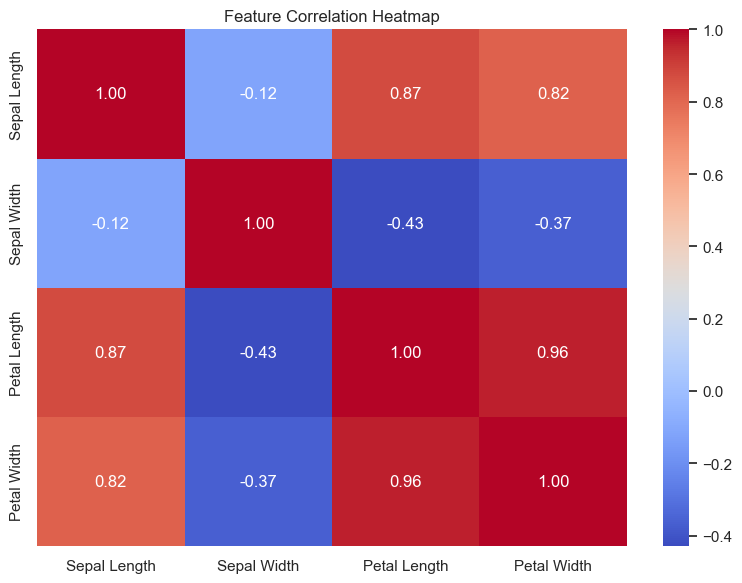

In [9]:
corr = df[FEATURE_COLS].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=FEATURE_NAMES.values(),
            yticklabels=FEATURE_NAMES.values(), ax=ax)
ax.set_title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## 7. Histograms by Species

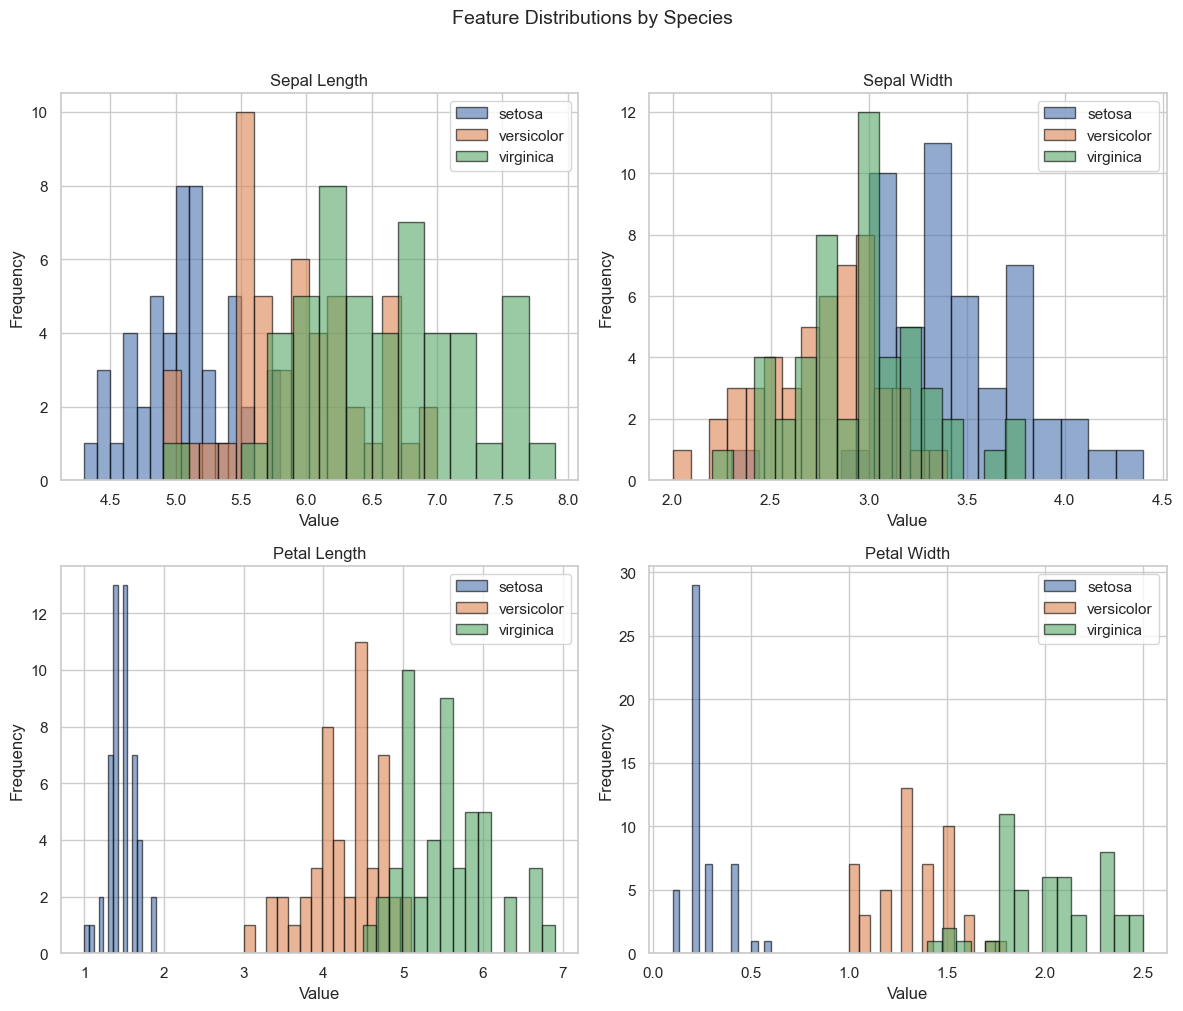

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axes.ravel(), FEATURE_COLS):
    for species in classes:
        subset = df[df["species"] == species]
        ax.hist(subset[col], bins=15, alpha=0.6, label=species, edgecolor="black")
    ax.set_title(FEATURE_NAMES[col])
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.suptitle("Feature Distributions by Species", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

## 8. Box Plots by Species

/var/folders/5g/wpjnn04d74z2w6z96x_9pc180000gn/T/ipykernel_64991/3148923072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=col, ax=ax, palette="Set2")
/var/folders/5g/wpjnn04d74z2w6z96x_9pc180000gn/T/ipykernel_64991/3148923072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=col, ax=ax, palette="Set2")
/var/folders/5g/wpjnn04d74z2w6z96x_9pc180000gn/T/ipykernel_64991/3148923072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y=col, ax=ax, palette="Set2")
/var/fo

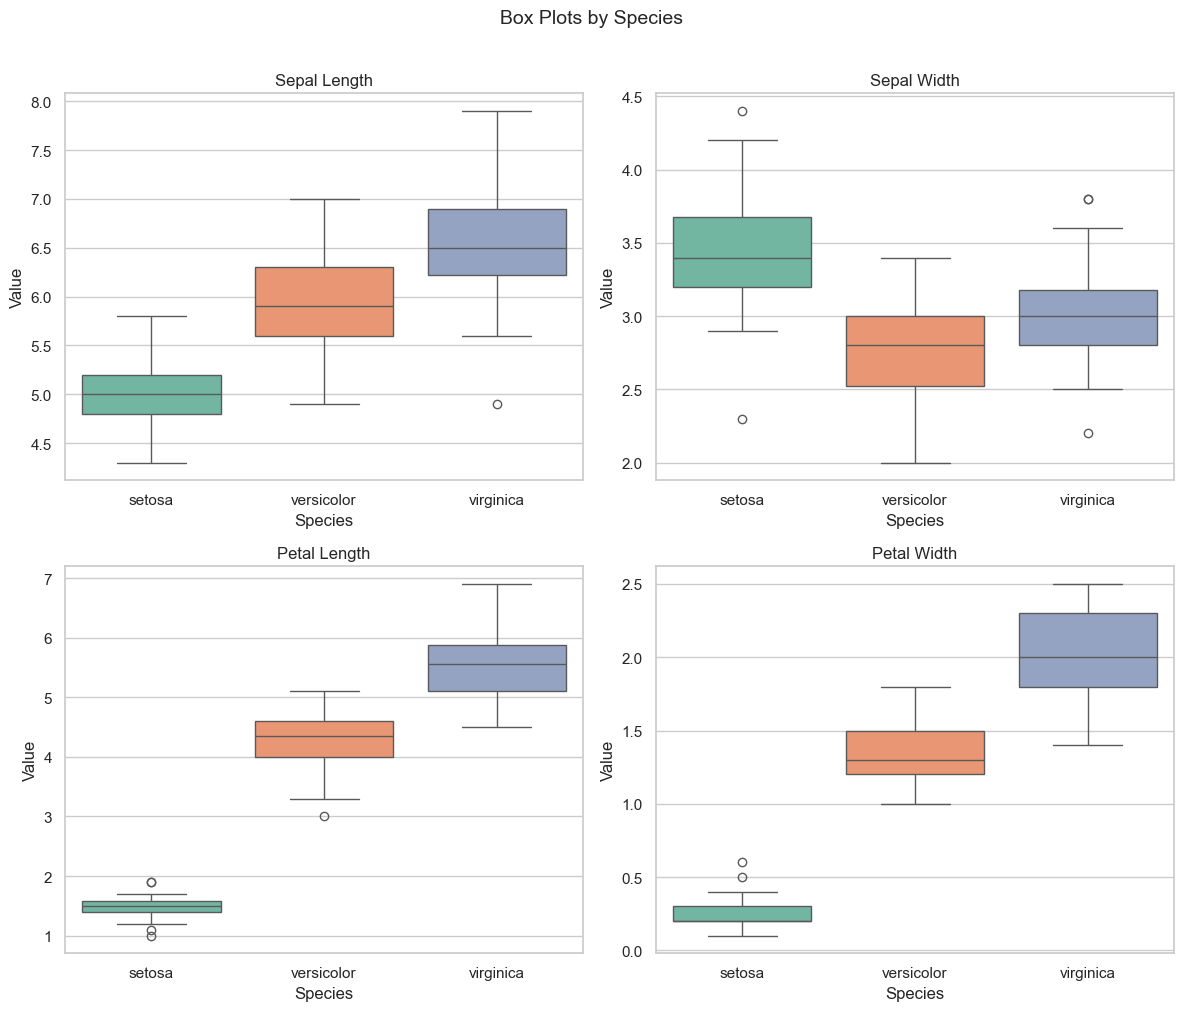

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axes.ravel(), FEATURE_COLS):
    sns.boxplot(data=df, x="species", y=col, ax=ax, palette="Set2")
    ax.set_title(FEATURE_NAMES[col])
    ax.set_xlabel("Species")
    ax.set_ylabel("Value")

plt.suptitle("Box Plots by Species", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

## 9. Scatter Plots

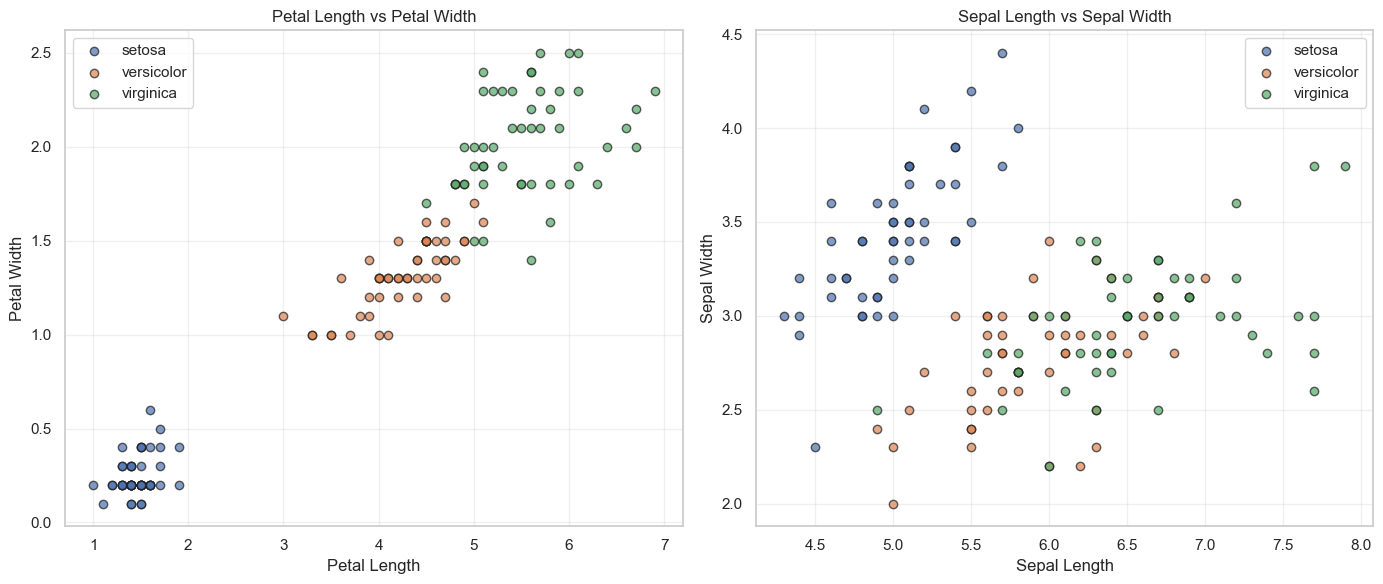

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Petal Length vs Petal Width
for species in classes:
    subset = df[df["species"] == species]
    axes[0].scatter(subset["meas_3"], subset["meas_4"], label=species, alpha=0.7, edgecolors="k")
axes[0].set_xlabel("Petal Length")
axes[0].set_ylabel("Petal Width")
axes[0].set_title("Petal Length vs Petal Width")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Sepal Length vs Sepal Width
for species in classes:
    subset = df[df["species"] == species]
    axes[1].scatter(subset["meas_1"], subset["meas_2"], label=species, alpha=0.7, edgecolors="k")
axes[1].set_xlabel("Sepal Length")
axes[1].set_ylabel("Sepal Width")
axes[1].set_title("Sepal Length vs Sepal Width")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Pairplot (Scatter Matrix)

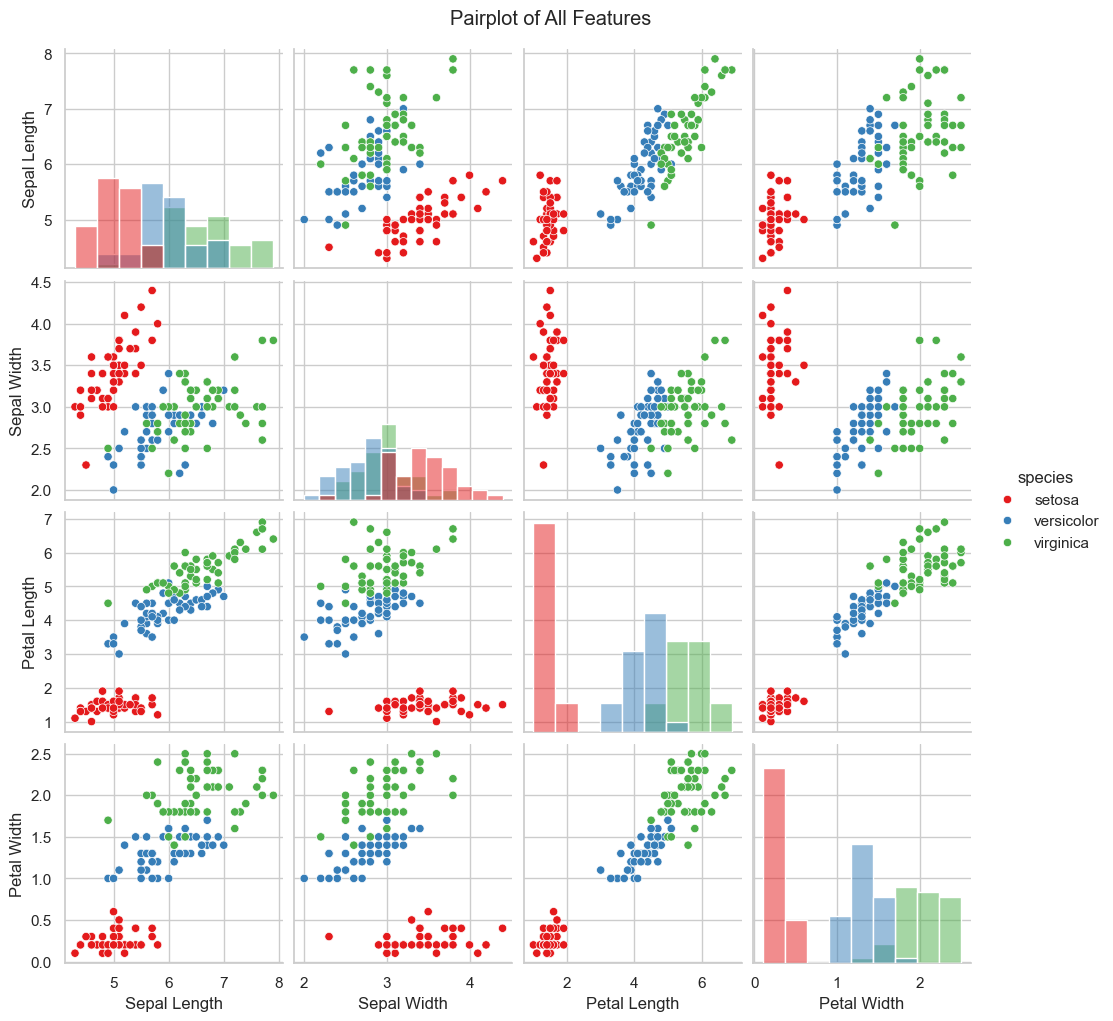

In [12]:
plot_df = df.rename(columns=FEATURE_NAMES)
sns.pairplot(plot_df, hue="species", diag_kind="hist", palette="Set1")
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

## 11. Skewness & Kurtosis

In [13]:
dist_stats = pd.DataFrame({
    "Feature": [FEATURE_NAMES[c] for c in FEATURE_COLS],
    "Skewness": [df[c].skew() for c in FEATURE_COLS],
    "Kurtosis": [df[c].kurt() for c in FEATURE_COLS],
})
dist_stats

,Feature,Skewness,Kurtosis
0,Sepal Length,0.3149,-0.5521
1,Sepal Width,0.3190,0.2282
2,Petal Length,-0.2749,-1.4021
3,Petal Width,-0.1030,-1.3406
